In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

In [2]:
x,y,c = make_blobs(500, cluster_std= 0.8, centers=4, n_features=2, return_centers=True)

Preparando los DF

In [3]:
#creamos el data frame
df_blobs = pd.DataFrame({'x_01':x[:,0], 'x_02':x[:,1], 'y':y})
df_blobs.head()

,x_01,x_02,y
0,11.316753,1.761553,3
1,-2.391265,2.463461,2
2,-2.603651,5.825225,0
3,9.583567,0.151447,3
4,-2.576855,5.299686,0


In [4]:
df_centers = pd.DataFrame({'x_01': c[:,0],'x_02' :c[:,1]})

Visualizamos los datos

In [14]:
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['DejaVu Sans']

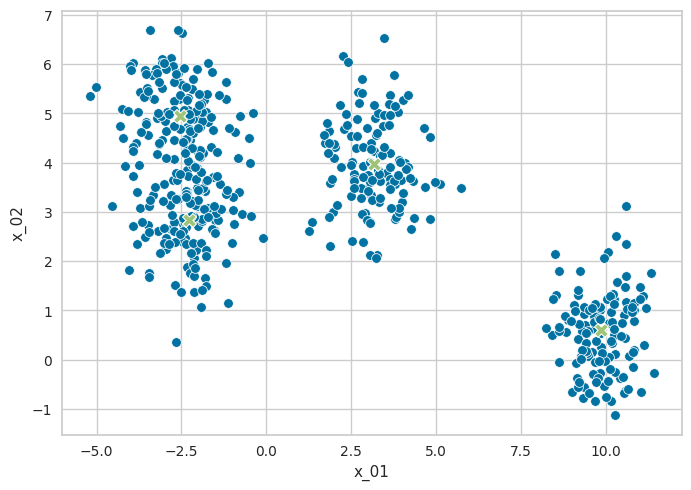

In [15]:
sns.scatterplot(data=df_blobs, x=df_blobs['x_01'], y=df_blobs['x_02'])
sns.scatterplot(data=df_centers,  x=df_centers['x_01'], y=df_centers['x_02'], marker='X', s=100 )
plt.show()

Utilizamos kmeans

In [16]:
kmeans = KMeans(n_clusters=4)
df_cluster = kmeans.fit_predict(x)
df_blobs['cluster'] = df_cluster
k_means_centers = kmeans.cluster_centers_
df_k_means_center = pd.DataFrame({'x_01':k_means_centers[:,0],'x_02':k_means_centers[:,1]})

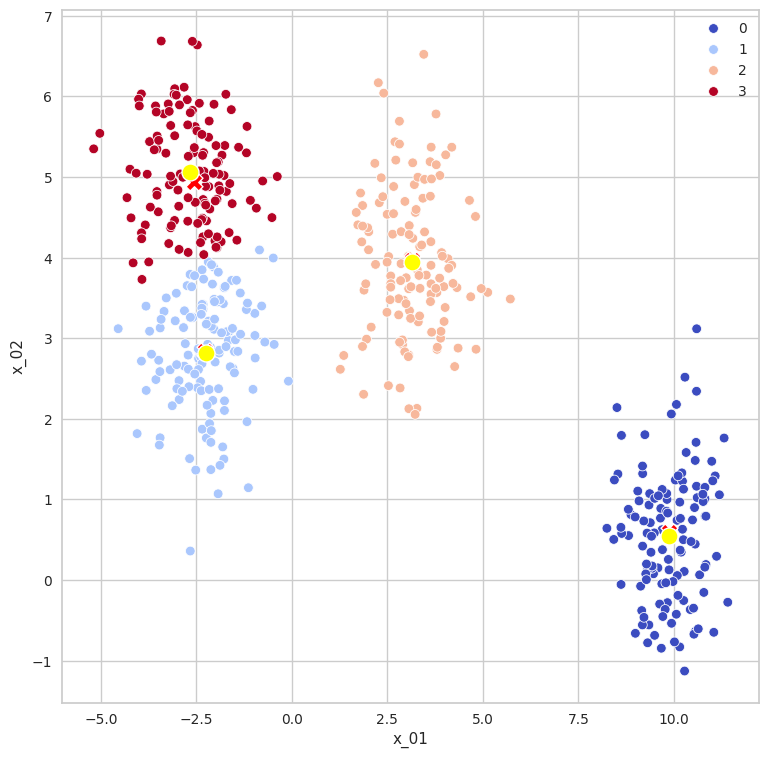

In [17]:
fig = plt.figure(figsize=(9,9))
sns.scatterplot(data=df_blobs,  x='x_01', y='x_02', hue= 'cluster', palette='coolwarm')
sns.scatterplot(data=df_centers,  x='x_01', y='x_02', marker='X', s=150 , color='red')
sns.scatterplot(data=df_k_means_center,  x='x_01', y='x_02', marker='o', s=150 , color='yellow')
plt.show()

In [18]:
def vis_cluster(k):
    kmeans = KMeans(n_clusters=k)
    df_cluster = kmeans.fit_predict(x)
    df_blobs['cluster'] = df_cluster
    k_means_centers = kmeans.cluster_centers_
    df_k_means_center = pd.DataFrame({'x_01':k_means_centers[:,0], 'x_02':k_means_centers[:,1]})    
    fig = plt.figure(figsize=(9,9))
    sns.scatterplot(data=df_blobs,  x='x_01', y='x_02', hue= 'cluster', palette='coolwarm')
    sns.scatterplot(data=df_centers,  x='x_01', y='x_02', marker='X', s=150 , color='red')
    sns.scatterplot(data=df_k_means_center,  x='x_01', y='x_02', marker='o', s=150 , color='yellow')
    plt.show()

2


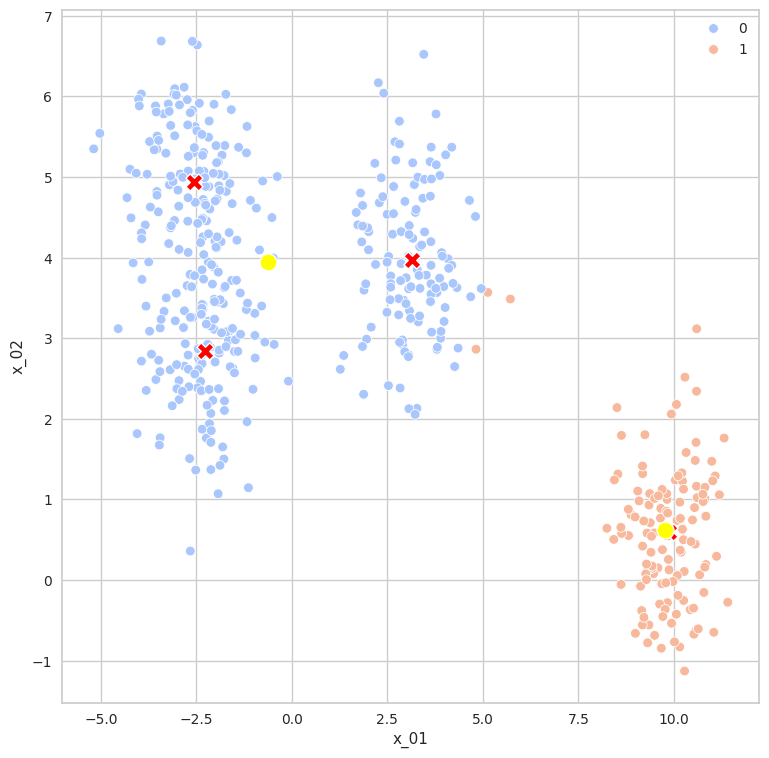

3


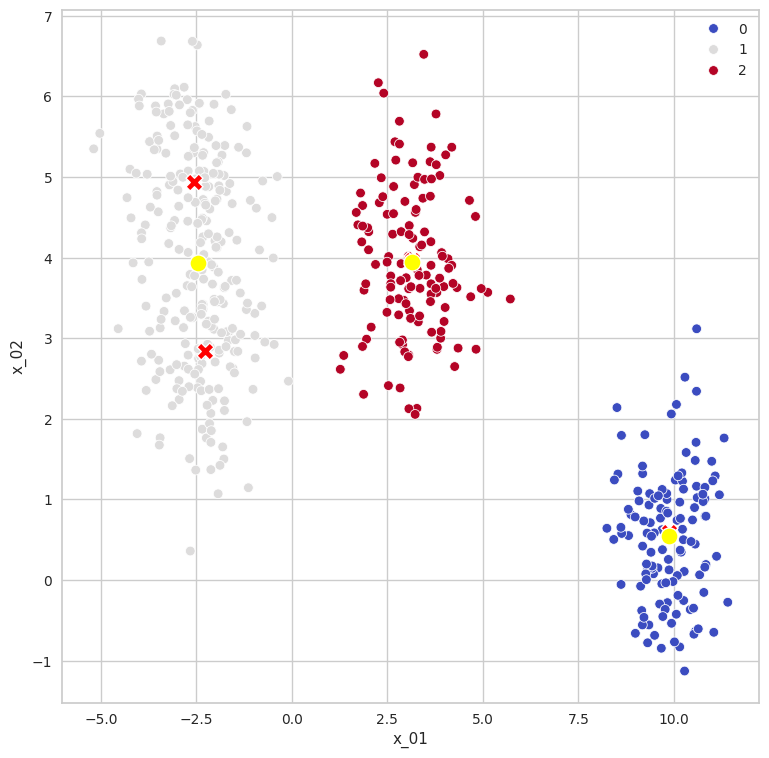

4


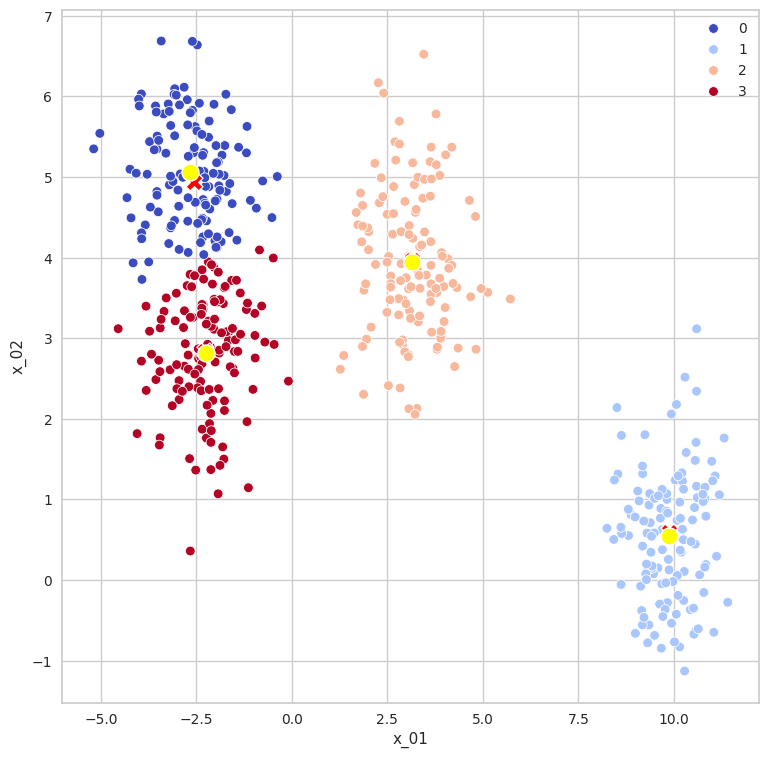

5


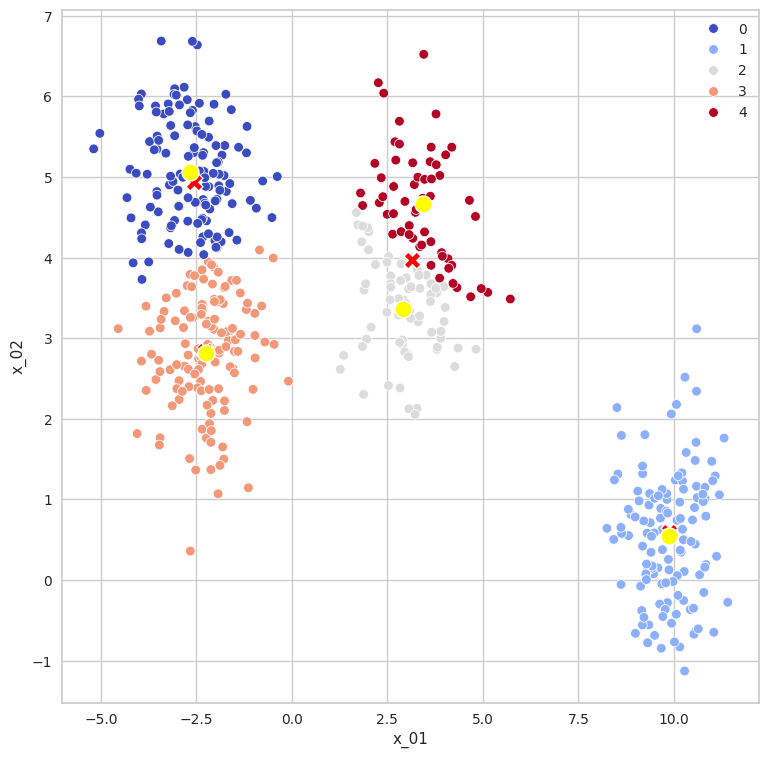

6


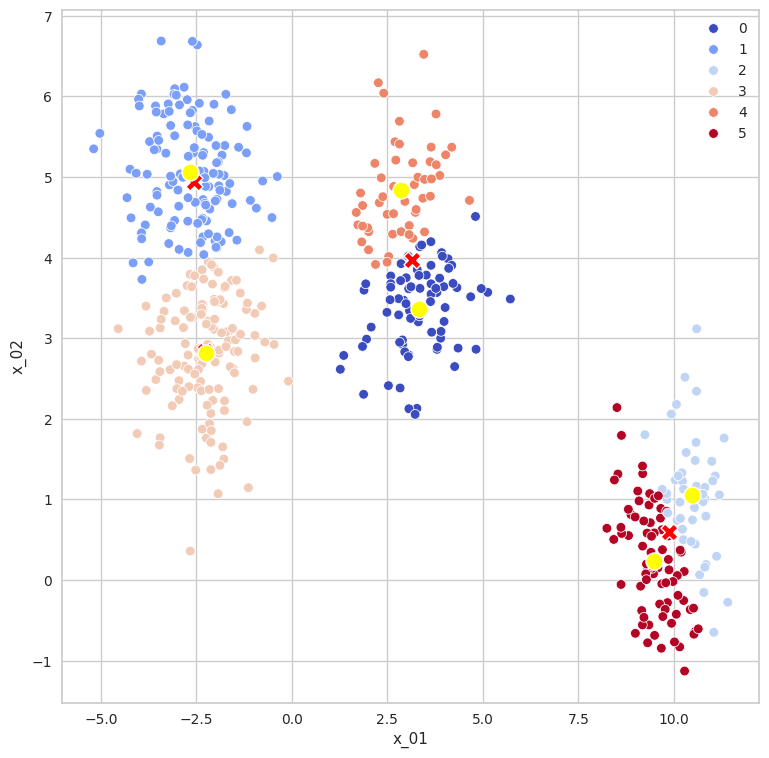

In [19]:
for _ in range(2,7):
    print(_)
    vis_cluster(_)

Buscamos el valor de k

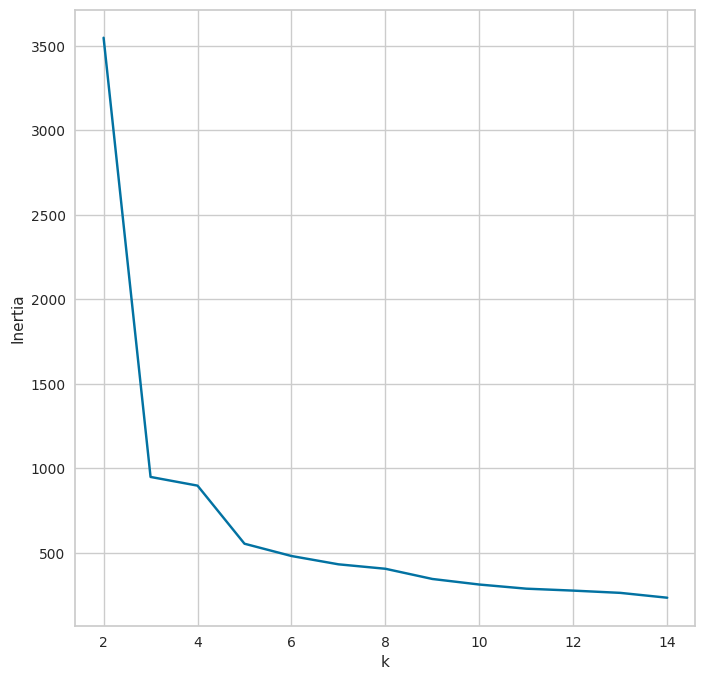

In [20]:
sum_of_squared_distances = []
K = range(2,15)
for k in K: 
    km = KMeans(n_clusters=k)
    km = km.fit(x)
    sum_of_squared_distances.append(km.inertia_)

plt.figure(figsize=(8,8))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

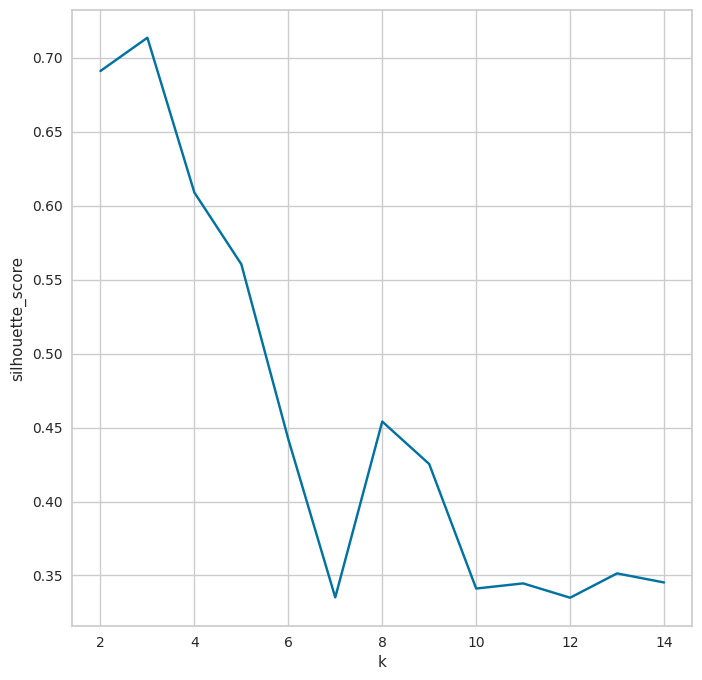

In [21]:
silhouette_scores = []
K = range(2,15)
for k in K: 
    km = KMeans(n_clusters=k)
    km = km.fit(x)
    y = km.predict(x)
    silhouette_scores.append(silhouette_score(x,y))

plt.figure(figsize=(8,8))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.show()

SilhouetteVisualizer(ax=<Axes: >, colors='yellowbrick',
                     estimator=KMeans(n_clusters=4))

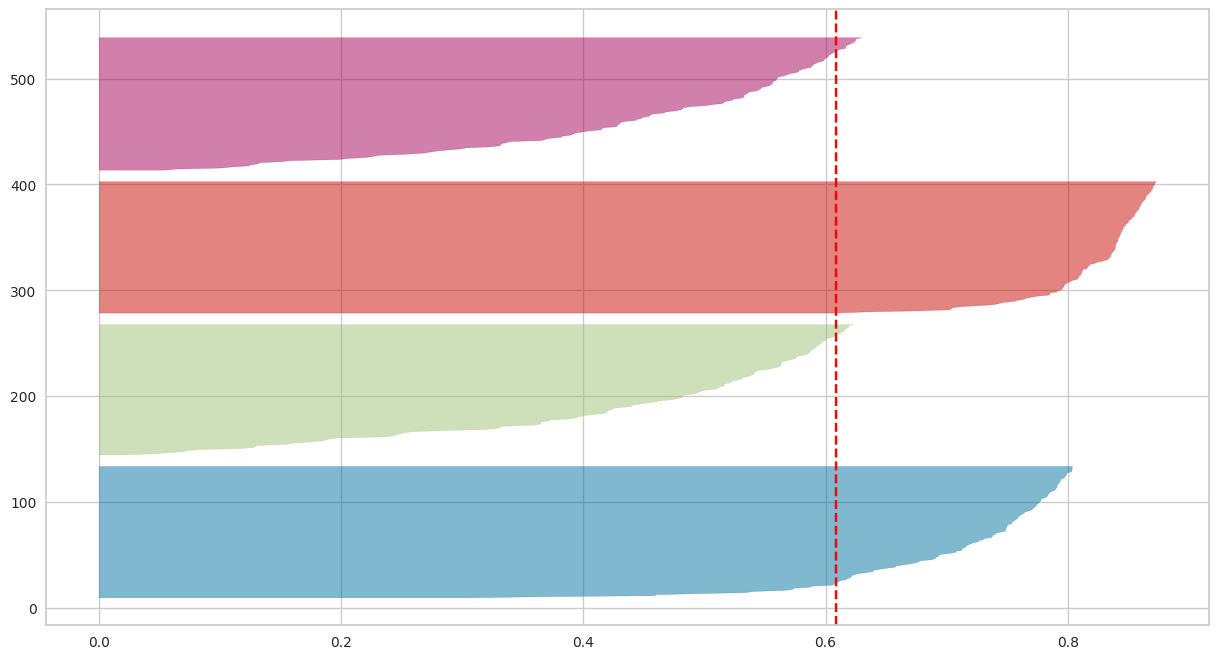

In [22]:
plt.figure(figsize=(15,8))
km = KMeans(n_clusters=4) 
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(x)